In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import openweathermapy.core as owm
# Dependencies
import requests
import random
#from config import api_key
from config import gkey
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta


In [3]:
Jan = pd.read_csv("RideShare_Data_201801.csv", parse_dates=[0], low_memory=False)
Feb = pd.read_csv("RideShare_Data_201802.csv", parse_dates=[0], low_memory=False)
Mar = pd.read_csv("RideShare_Data_201803.csv", parse_dates=[0], low_memory=False)
Apr = pd.read_csv("RideShare_Data_201804.csv", parse_dates=[0], low_memory=False)
May = pd.read_csv("RideShare_Data_201805.csv", parse_dates=[0], low_memory=False)
Jun = pd.read_csv("RideShare_Data_201806.csv", parse_dates=[0], low_memory=False)
Jul = pd.read_csv("RideShare_Data_201807.csv", parse_dates=[0], low_memory=False)
Aug = pd.read_csv("RideShare_Data_201808.csv", parse_dates=[0], low_memory=False)
Sep = pd.read_csv("RideShare_Data_201809.csv", parse_dates=[0], low_memory=False)
Oct = pd.read_csv("RideShare_Data_201810.csv", parse_dates=[0], low_memory=False)
Nov = pd.read_csv("RideShare_Data_201811.csv", parse_dates=[0], low_memory=False)
Dec = pd.read_csv("RideShare_Data_201812.csv", parse_dates=[0], low_memory=False)
src_df = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])



In [4]:
src_df["week_day"] =pd.to_datetime(src_df["Pickup_DateTime"]).dt.dayofweek

src_df.head()
src_df["week_day"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [5]:
def fdayofweek(x):
    return {
        0:'Monday',
        1:'Tuesday',
        2:'Wednesday',
        3:'Thrusday',
        4:'Friday',
        5:'Saturday',
        6:'Sunday',
     }.get(x, "NA")



src_df["week_day_name"]= src_df["week_day"].apply(fdayofweek)
src_df["week_day_name"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [6]:
src_df["hours"] =pd.to_datetime(src_df["Pickup_DateTime"]).dt.hour
src_df["hours"]

# Create bins in which to place values based upon TED Talk views
bins = [-1, 11, 12, 16, 17, 23]
       

# Create labels for these bins
group_labels = ["Morning", "Noon", "afternoon", "evening", "night"]

In [7]:
src_df["hours_group"]= pd.cut(src_df["hours"], bins, labels=group_labels)


In [8]:
src_df['weather_main'] = src_df['weather_main'].astype(str)
weather_grp_df = src_df.groupby(src_df['weather_main'])
weather_grp_df.head()


,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description,week_day,week_day_name,hours,hours_group
0,2018-01-01 22:22:03,2018-01-01 22:44:48,205.0,63.0,1.0,"Saint Albans, Queens","Cypress Hills, Brooklyn",11366,11216,22.750000,17,34,3,800,Clear,sky is clear,0,Monday,22,night
1,2018-01-01 12:44:06,2018-01-01 13:12:08,125.0,93.0,0.0,"Hudson Sq, Manhattan","Flushing Meadows-Corona Park, Queens",10024,11366,28.033333,6,60,2,800,Clear,sky is clear,0,Monday,12,Noon
2,2018-01-01 00:28:16,2018-01-01 00:41:23,39.0,71.0,1.0,"Canarsie, Brooklyn","East Flatbush/Farragut, Brooklyn",11216,11216,13.116667,11,43,4,800,Clear,sky is clear,0,Monday,0,Morning
3,2018-01-01 02:42:55,2018-01-01 02:56:46,100.0,137.0,0.0,"Garment District, Manhattan","Kips Bay, Manhattan",10024,10024,13.850000,9,46,5,800,Clear,sky is clear,0,Monday,2,Morning
4,2018-01-01 14:15:46,2018-01-01 14:37:55,55.0,115.0,0.0,"Coney Island, Brooklyn","Grymes Hill/Clifton, Staten Island",11216,10306,22.150000,8,60,2,800,Clear,sky is clear,0,Monday,14,afternoon
8121,2018-01-02 12:15:06,2018-01-02 12:38:52,238.0,232.0,0.0,"Upper West Side North, Manhattan","Two Bridges/Seward Park, Manhattan",10024,10024,23.766667,11,61,3,803,Clouds,broken clouds,1,Tuesday,12,Noon
8138,2018-01-02 11:54:39,2018-01-02 12:00:50,155.0,91.0,1.0,"Marine Park/Mill Basin, Brooklyn","Flatlands, Brooklyn",11234,11216,6.183333,11,61,3,803,Clouds,broken clouds,1,Tuesday,11,Morning
8143,2018-01-02 12:06:37,2018-01-02 12:10:13,35.0,35.0,0.0,"Brownsville, Brooklyn","Brownsville, Brooklyn",11216,11216,3.600000,11,61,3,803,Clouds,broken clouds,1,Tuesday,12,Noon
8145,2018-01-02 12:02:29,2018-01-02 12:21:53,170.0,161.0,0.0,"Murray Hill, Manhattan","Midtown Center, Manhattan",10024,10036,19.400000,11,61,3,803,Clouds,broken clouds,1,Tuesday,12,Noon
8174,2018-01-02 11:45:38,2018-01-02 12:08:25,61.0,181.0,1.0,"Crown Heights North, Brooklyn","Park Slope, Brooklyn",11216,11216,22.783333,11,61,3,803,Clouds,broken clouds,1,Tuesday,11,Morning


In [9]:
day_hrs = src_df.groupby(['week_day_name','hours_group'])
day_hrs.count()
#(df.groupby(['cluster', 'org'], as_index=False).mean()
 #           .groupby('cluster')['time'].mean())
#weather_grp_df['hours_group'] .count()   

Pickup_DateTime  DropOff_datetime  PUlocationID  \
week_day_name hours_group                                                    
Friday        Morning               149529            149529        149529   
              Noon                   16849             16849         16849   
              afternoon              76603             76603         76603   
              evening                24406             24406         24406   
              night                 162353            162353        162353   
Monday        Morning               164914            164914        164914   
              Noon                   18125             18125         18125   
              afternoon              82248             82248         82248   
              evening                26043             26043         26043   
              night                 140411            140411        140411   
Saturday      Morning               151867            151867        151867   
              Noon                   19023             19023         19023   
              afternoon              83664             83664         83664   
              evening                24302             24302         24302   
              night                 161818            161818        161818   
Sunday        Morning               176108            176108        176108   
              Noon                   21258             21258         21258   
              afternoon              90360             90360         90360   
              evening                23575             23575         23575   
              night                 127116            127116        127116   
Thrusday      Morning               153093            153093        153093   
              Noon                   16731             16731         16731   
              afternoon              77274             77274         77274   
              evening                25176             25176         25176   
              night                 151544            151544        151544   
Tuesday       Morning               154281            154281        154281   
              Noon                   17112             17112         17112   
              afternoon              79946             79946         79946   
              evening                26298             26298         26298   
              night                 144646            144646        144646   
Wednesday     Morning               153126            153126        153126   
              Noon                   17194             17194         17194   
              afternoon              79176             79176         79176   
              evening                25768             25768         25768   
              night                 147638            147638        147638   

                           DOlocationID  SR_Flag  Pickup_City  Dropoff_City  \
week_day_name hours_group                                                     
Friday        Morning            149529   149529       149529        149529   
              Noon                16849    16849        16849         16849   
              afternoon           76603    76603        76603         76603   
              evening             24406    24406        24406         24406   
              night              162353   162353       162353        162353   
Monday        Morning            164914   164914       164914        164914   
              Noon                18125    18125        18125         18125   
              afternoon           82248    82248        82248         82248   
              evening             26043    26043        26043         26043   
              night              140411   140411       140411        140411   
Saturday      Morning            151867   151867       151867        151867   
              Noon                19023    19023        19023         19023   
              afternoon           

<IPython.core.display.Javascript object>


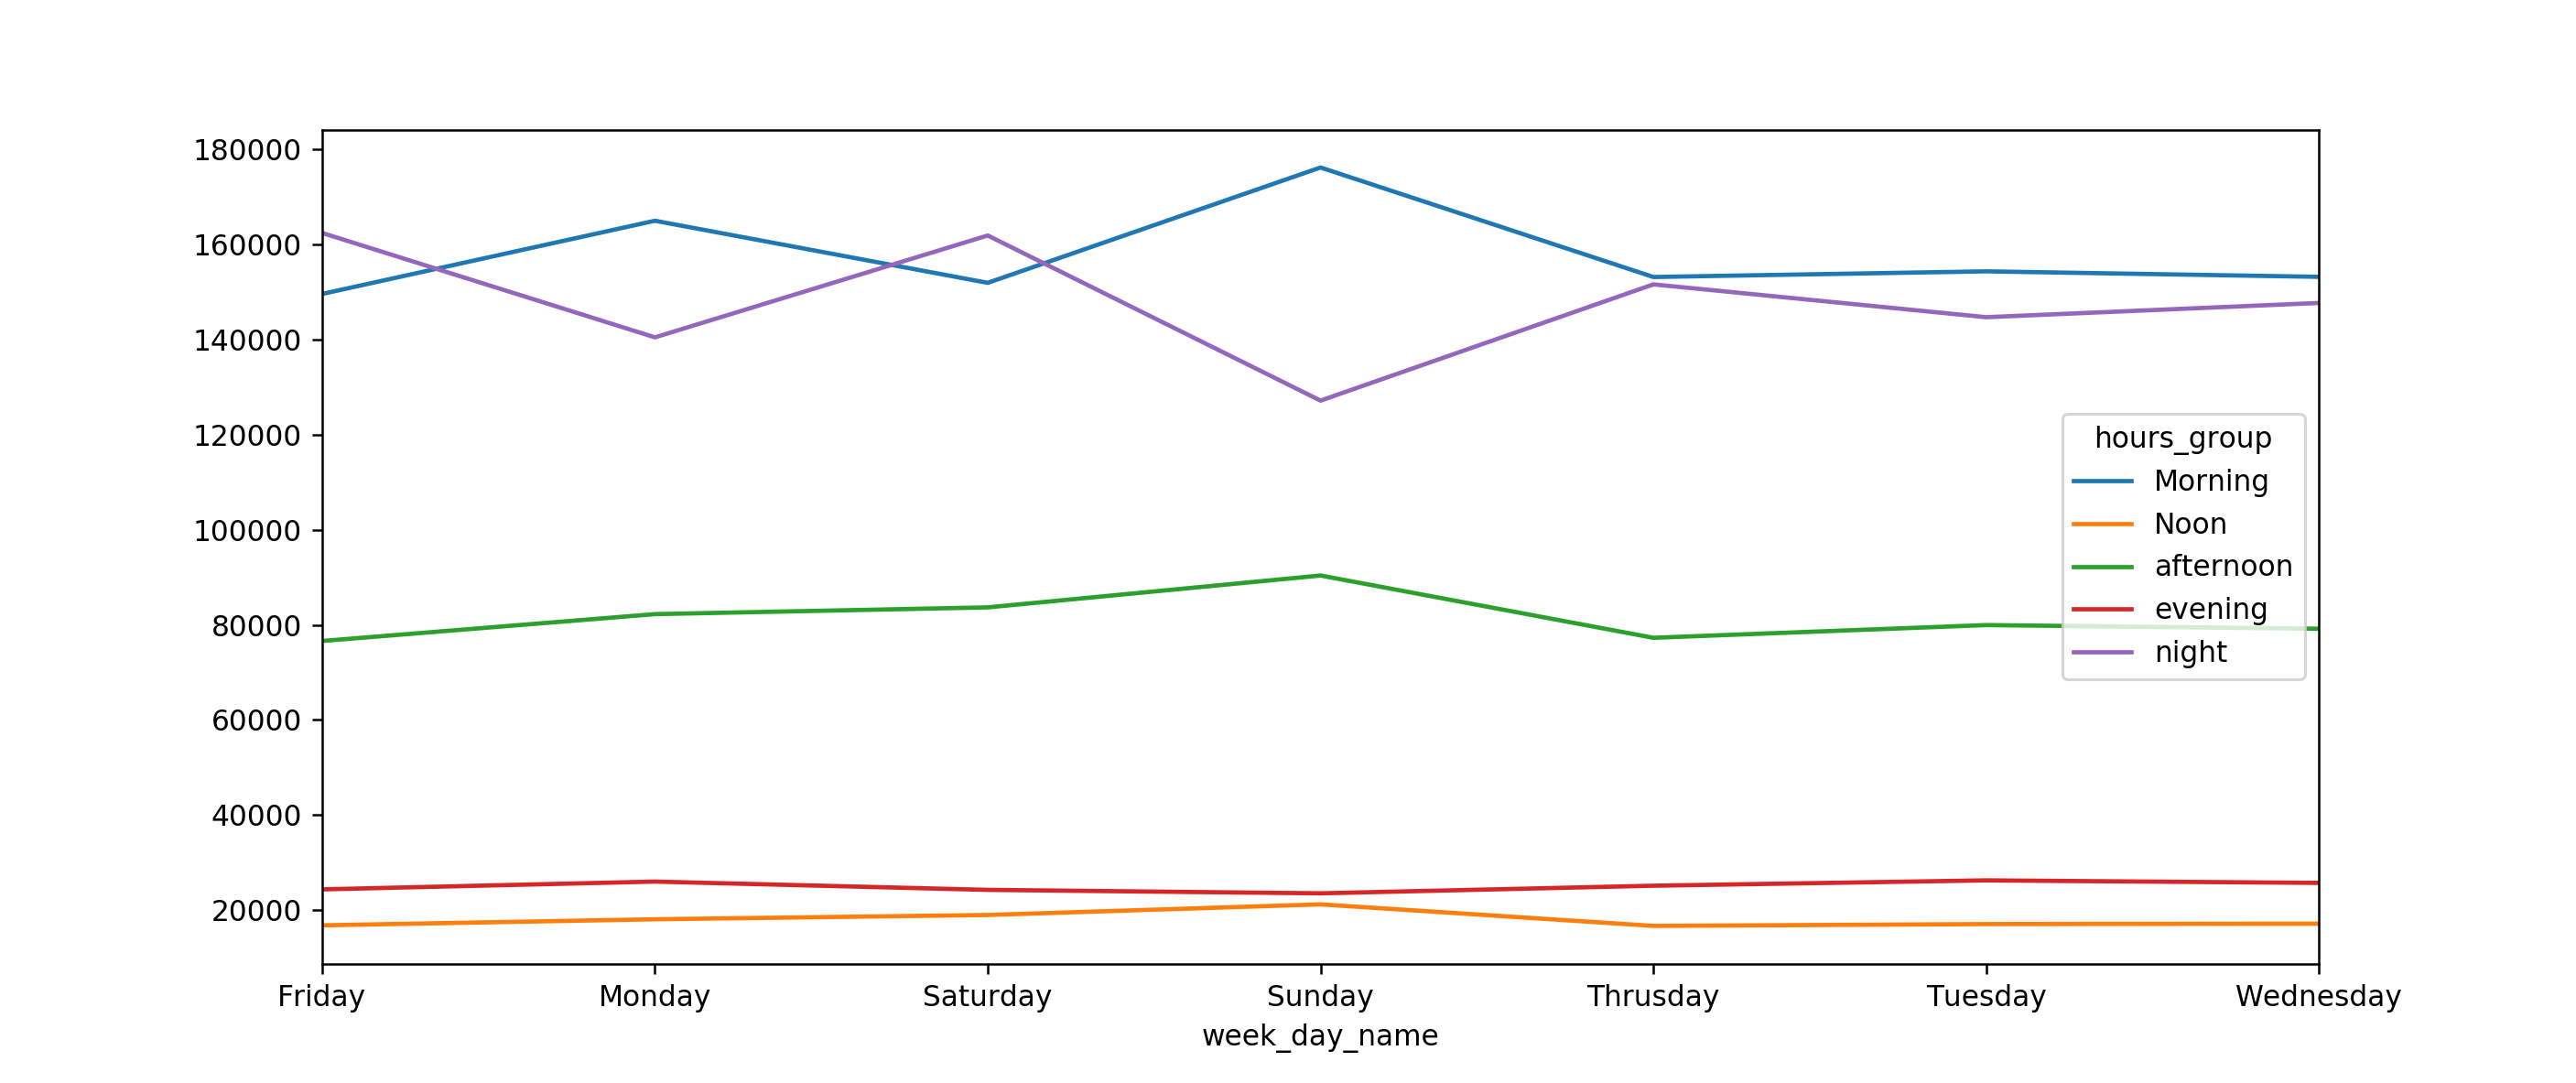

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
src_df.groupby(['week_day_name','hours_group']).count()['Trip_Duration'].unstack().plot(ax=ax)

In [11]:
# Save an image of the chart and print it to the screen
plt.savefig("Stackedline_201801_weekday_hourgroups.png")
plt.show()

<IPython.core.display.Javascript object>


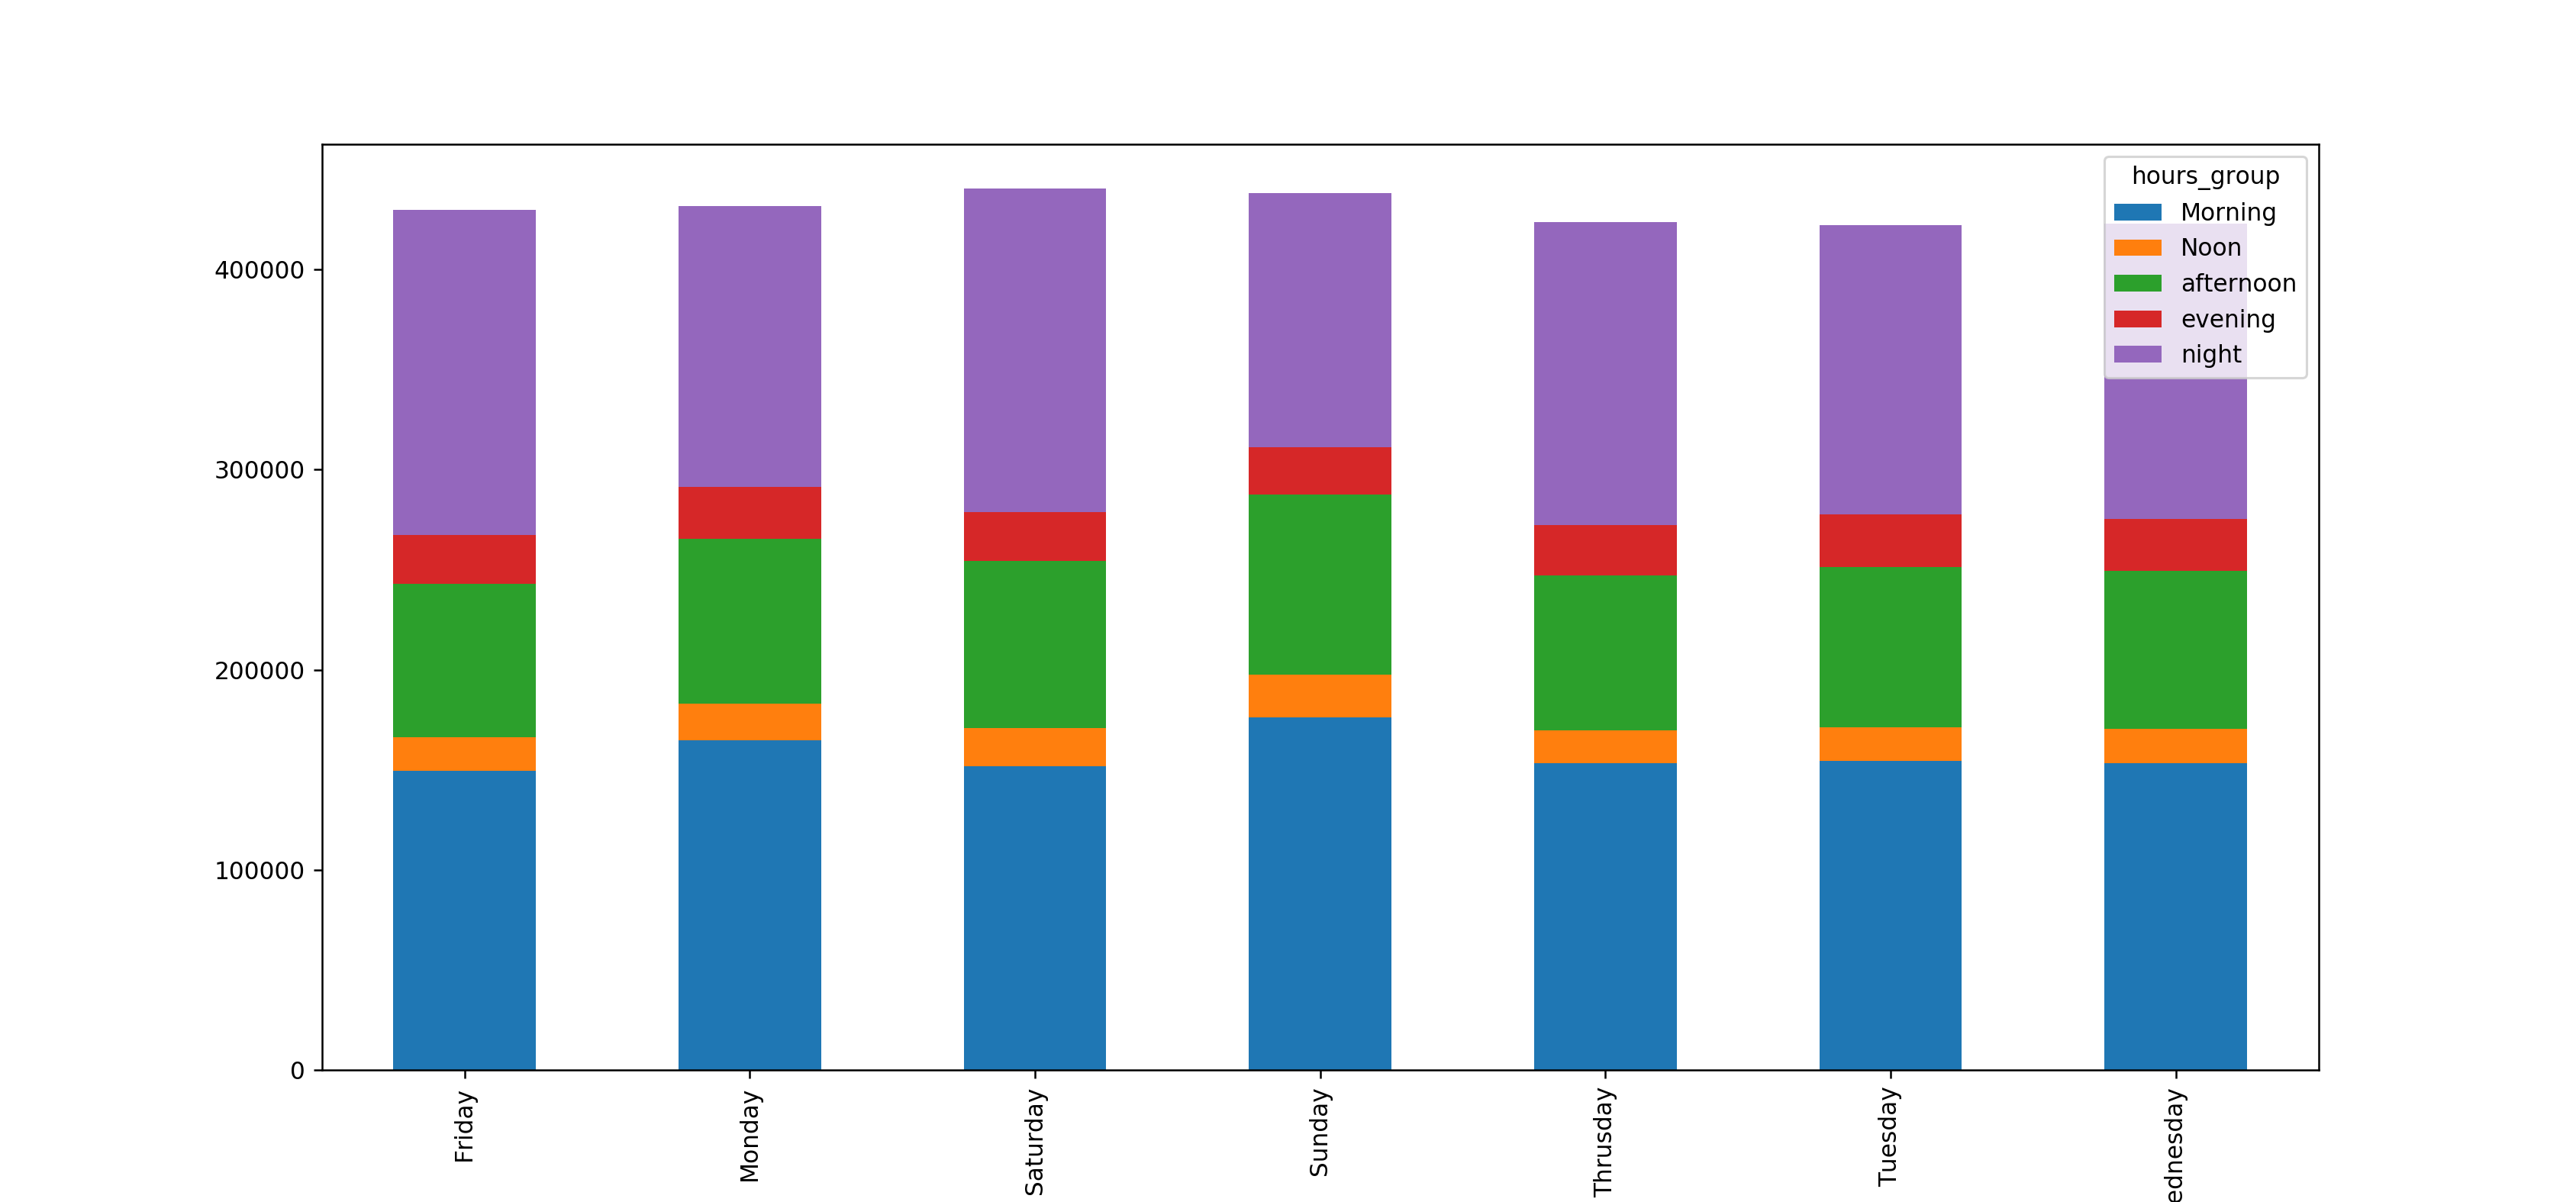

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
src_df.groupby(['week_day_name','hours_group']).size().unstack().plot(kind='bar',stacked=True,ax=ax)


In [13]:
# Save an image of the chart and print it to the screen
plt.savefig("StackedBar_201801_weather_hourly_weekday.png")
plt.show()